#Proyecto Final: Clasificacion de hongos.
El objetivo de este tranajo es identificar si existen características en el hongo que sean lo suficientemente significativas para que, con sólo verlo, olerlo e identificar el lugar donde se encuentra, se pueda determinar si un hongo es venenoso o comestible.

## Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
#Librerias de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Libreria para los modelos.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

##Datos
Nuestos conjunto de datos fue extraido de Kaggle: 
https://www.kaggle.com/uciml/mushroom-classification

### Importar Archivo

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [ ]:
!ls

'mushrooms (1).csv'   mushrooms.csv   sample_data


In [ ]:
uploaded

{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

Cambiar nuestro archivo a un DataFrame

In [ ]:
path='mushrooms.csv'
df = pd.read_csv(path)
type(df)

pandas.core.frame.DataFrame

Vista preeliminar de nuestro DataFrame

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##Limpieza de los datos
Reenombramos las variables

In [ ]:
values={"e":"edible","p":"poisonous"}
df["class"]=df["class"].replace(values)
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(values4)
values5={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(values11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(values12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

Nueva vista de nuestro DataFrame

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### Valores faltantes
Existen valores faltantes en nuestro dataframe *"missing"*

In [ ]:
df.isnull().any().any()

False

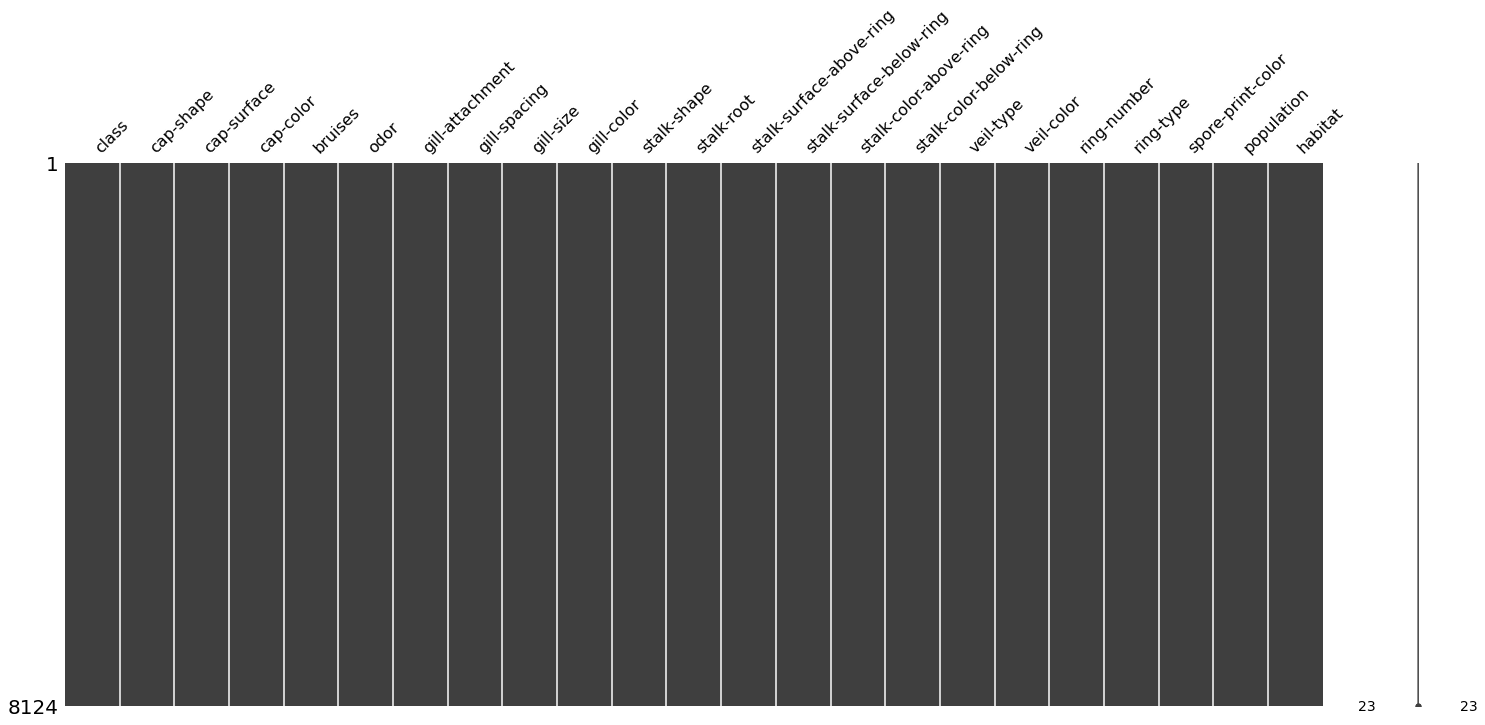

In [ ]:
msno.matrix(df)

In [ ]:
df.replace({'missing': np.nan}, inplace=True)

In [ ]:
df.isnull().any().any()

True

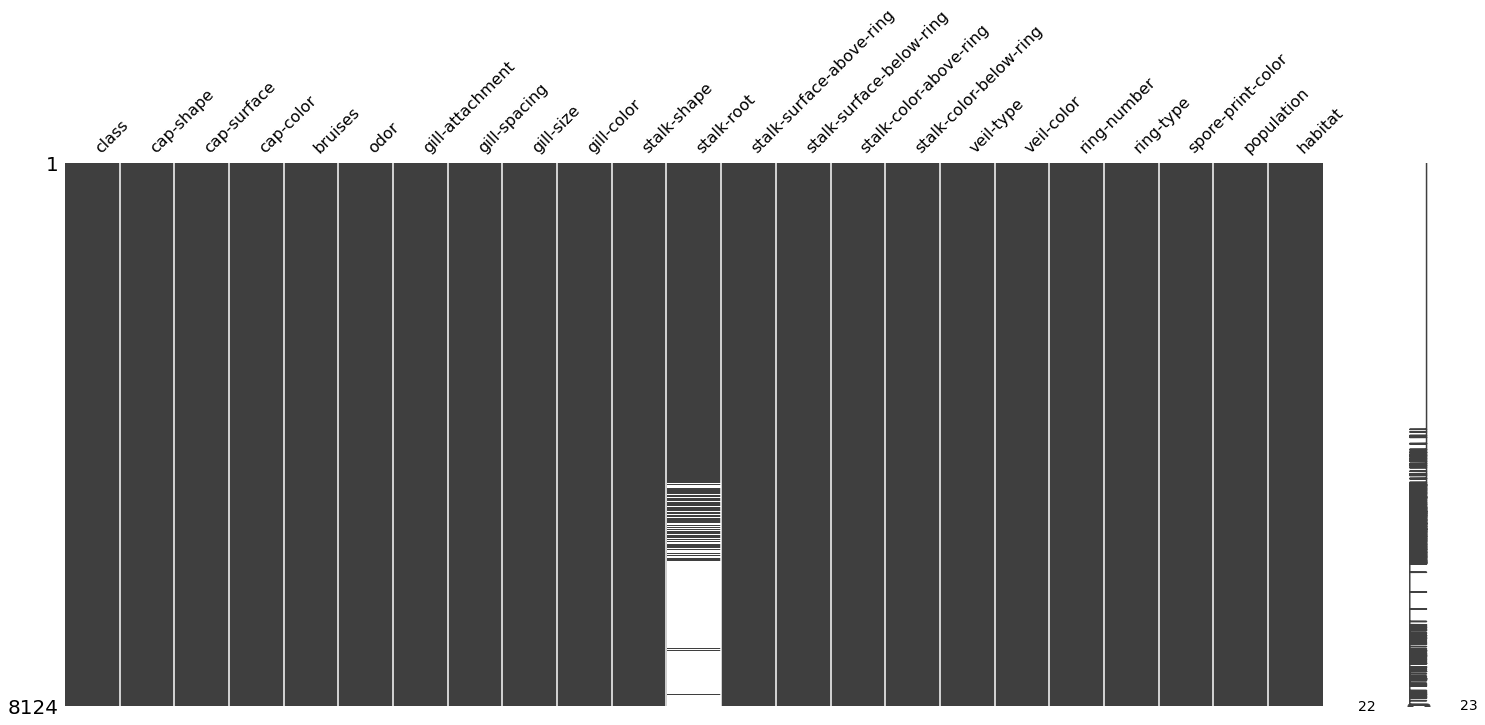

In [ ]:
msno.matrix(df)

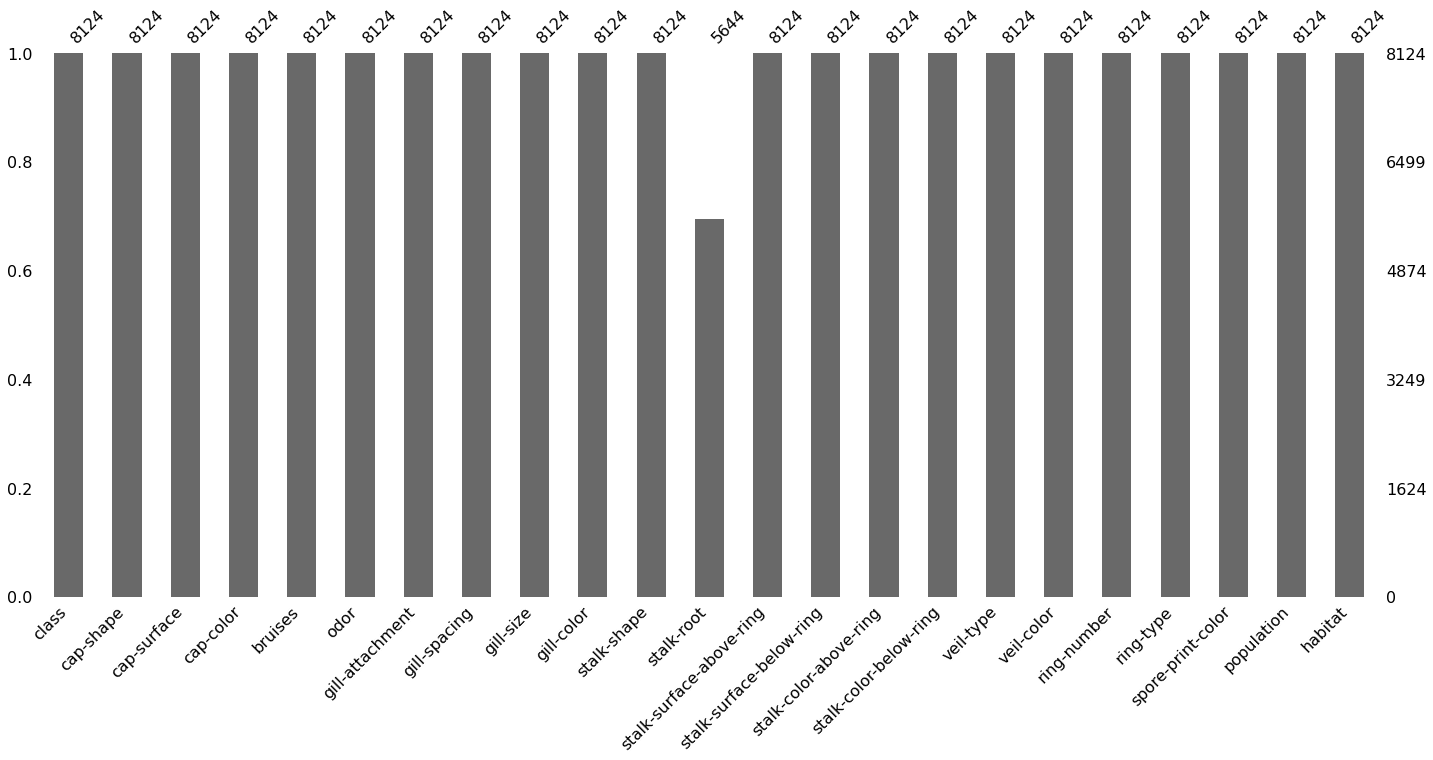

In [ ]:
msno.bar(df)

In [ ]:
df.columns[df.isnull().any()].tolist()

['stalk-root']

Tenemos valores faltantes en la columna *stalk-root*, en ocasiones estos valores no pueden ser visibles en algunas especies de hongos.

## Descripción de los Datos

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.agg(['count', 'size', 'nunique'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
size,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
nunique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7


## Variables de interes

### Habitat 
Análisis de habitat únicos de nuestro DataFrame

In [ ]:

df.habitat.unique()

array(['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'],
      dtype=object)

In [ ]:
df.habitat.nunique()

7

In [ ]:
df.habitat.value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

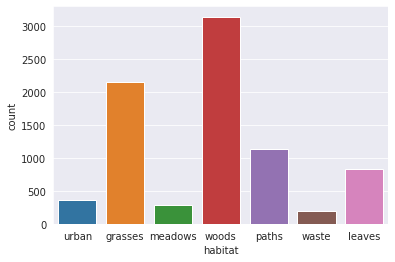

In [ ]:
sns.set_style('darkgrid')
sns.countplot(df['habitat'])

### Class
Incluye dos categorías Edible y Poisonous

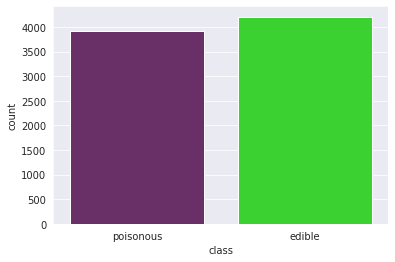

In [ ]:
sns.set_style('darkgrid')
sns.countplot(df['class'], palette=['#722672','#24ED16'])

Relacion entre hongos comestibles o venenosos, con el habitat.

In [ ]:
fig = px.scatter(df, x="habitat", y="population", color="class",color_discrete_sequence=['#722672','#24ED16'], 
                 title="Mushroom Type (Habitat vs Population)")
fig.show()

Relación de la variable class con *bruises* y *odor*

In [ ]:
#df[['class', "bruises"]].values

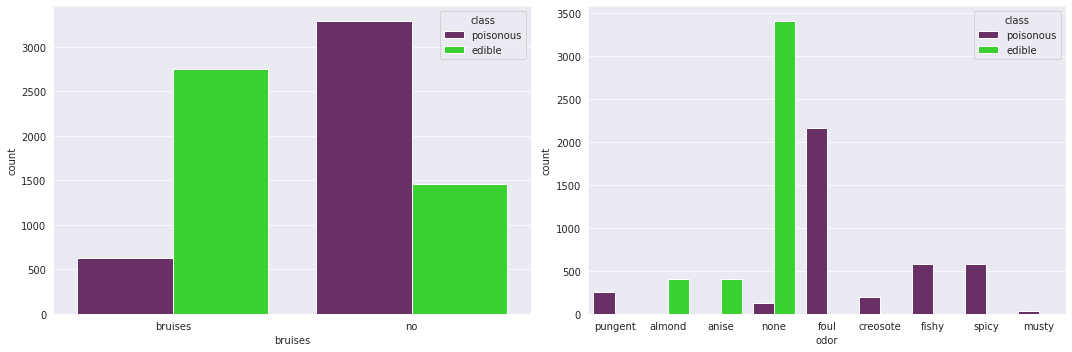

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="bruises", hue='class', palette=['#722672','#24ED16'], data=df, ax=ax[0])
sns.countplot(x="odor", hue='class', palette=['#722672','#24ED16'], data=df, ax=ax[1])
fig.tight_layout()
fig.show()

In [ ]:
id_class = [1 if i=="edible" else 0 for i in df["class"]]
ID = pd.DataFrame(id_class)

In [ ]:
df_copy=df.copy()
df_copy['ID_Class']=ID[0]
df_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,ID_Class
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,1
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,1
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,1


Comportamiento de la variable *Class* con las caracteristicas fisicas del sombrero. Como la forma, superficie y color. 


*   Forma
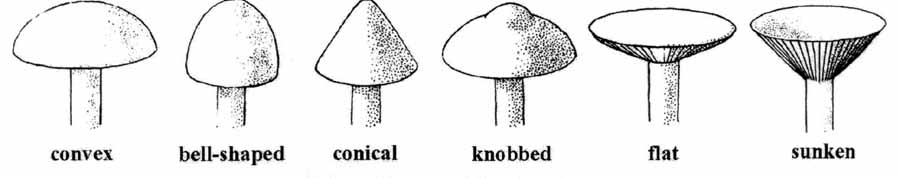
*   Textura

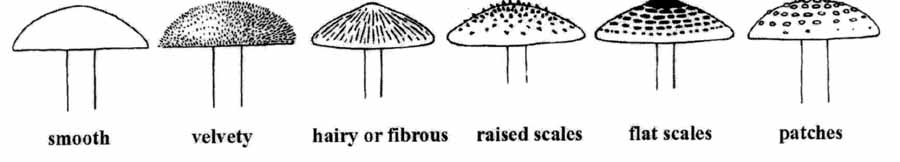

In [ ]:
df_cap = df_copy[["ID_Class",'class', 'cap-shape', 'cap-surface', 'cap-color']]
#df_cap.head()

In [ ]:
fig = px.parallel_categories(df_cap, color="ID_Class", title="Mushroom Type vs Cap Characteristics", 
                             color_continuous_scale=['#722672','#FF6B0F','#24ED16'])
fig.show()

De igual manera analizamos el comportamiento con algunas caracteristicas fisicas de las láminas ubicadas debajo del sombrero.


*   Tipo de unión.
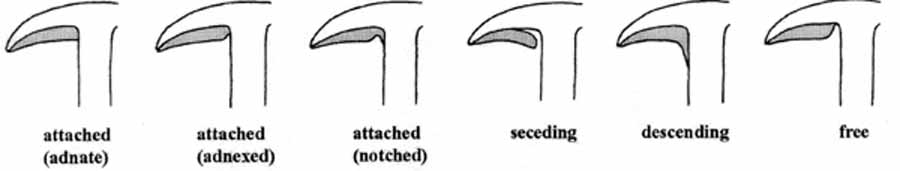
*   El espacio que hay entre estas.
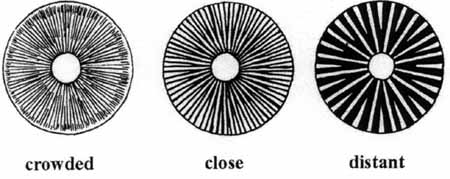


In [ ]:
df_gill = df_copy[["ID_Class",'class', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
#df_cap.head()

In [ ]:
fig = px.parallel_categories(df_gill, color="ID_Class", title="Mushroom Type vs Gill Characteristics", 
                             color_continuous_scale=['#722672','#FF6B0F','#24ED16'])
fig.show()

La variable con respecto al numero de anillos que contiene.

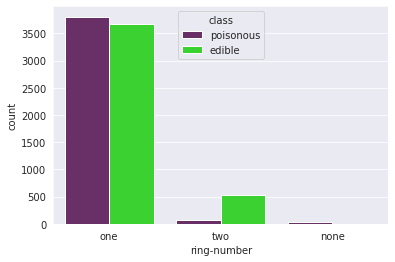

In [ ]:
sns.countplot(x="ring-number", hue='class', palette=['#722672','#24ED16'], data=df)


Queremos saber cuantos hongos existen en cada clase a manera de resumen.

In [ ]:
df.groupby('class').agg(['count', 'size', 'nunique']).stack()

cap-shape  cap-surface  ...  population  habitat
class                                      ...                     
edible    count         4208         4208  ...        4208     4208
          size          4208         4208  ...        4208     4208
          nunique          5            3  ...           6        7
poisonous count         3916         3916  ...        3916     3916
          size          3916         3916  ...        3916     3916
          nunique          5            4  ...           4        6

[6 rows x 22 columns]

## Modelo Supervisado

## Transformación de los datos

In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,0,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
encoded_df = pd.get_dummies(df)
encoded_df.head(5)

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,...,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
encoded_df.tail(5)

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,...,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
8119,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8121,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8123,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


Definimos los datos de muestra y prueba, asi como los parametros

In [ ]:
y = df['class'].values.reshape(-1, 1)
X = encoded_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= None)

### Regresión Logistica

In [ ]:
logistc_reg = LogisticRegression()

In [ ]:
logistc_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prob = logistc_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [ ]:
y_prob

array([0.99021877, 0.99688728, 0.99943398, ..., 0.99896182, 0.99993941,
       0.99988324])

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)

confusion_matrix

array([[841,   0],
       [  0, 784]])

In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

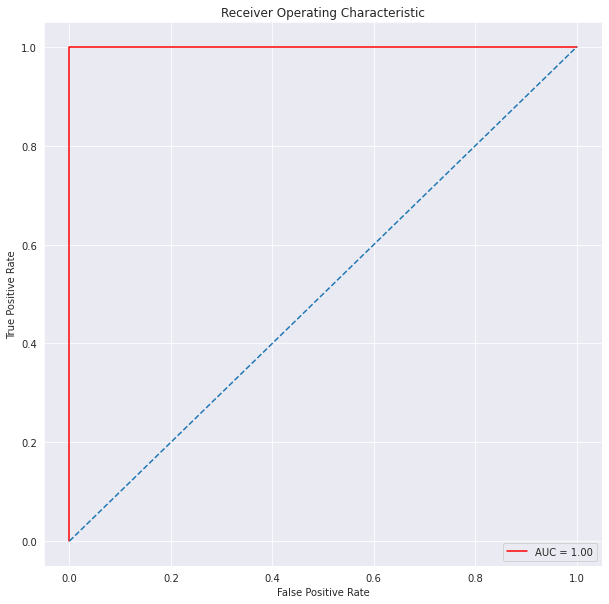

In [ ]:
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(roc_auc)

##  Cluster (k-means)

In [ ]:
Suma_de_distancias_cuadradas = []
K = range(1,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(encoded_df)
    Suma_de_distancias_cuadradas.append(km.inertia_)

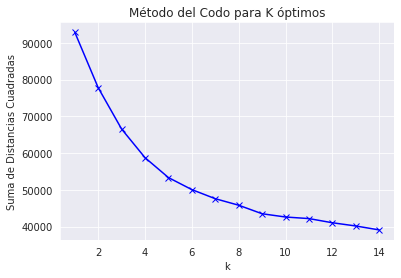

In [ ]:
plt.plot(K,Suma_de_distancias_cuadradas, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de Distancias Cuadradas')
plt.title('Método del Codo para K óptimos')
plt.show()

In [ ]:
kmeans = KMeans(
    init = 'k-means++',
    n_clusters = 6, 
    n_init = 10,
    max_iter =300,
    random_state = None
)

In [ ]:
kmeans.fit(encoded_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
import pylab as pl

In [ ]:
cl = kmeans.fit_predict(encoded_df)

In [ ]:
encoded_df['Cluster']=cl

In [ ]:
encoded_df

,class,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_bruises,bruises_no,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,...,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-number_none,ring-number_one,ring-number_two,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,Cluster
0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,5
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5
8120,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5
8121,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5
8122,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
df.index=encoded_df.index

In [ ]:
df['Cluster']=encoded_df['Cluster']

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Cluster
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
1,0,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,5
2,0,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,5
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
4,0,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,5
8120,0,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves,5
8121,0,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,5
8122,1,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves,1


## Resultados

In [ ]:
#df_capc=df[['Cluster','cap-shape','cap-surface','cap-color']]
#fig = px.parallel_categories(df_capc, color="Cluster", title="Mushroom Types", 
                             color_continuous_scale=['#722672','#FF6B0F','#24ED16'])
#fig.show()

In [ ]:
df.groupby(["Cluster"]).count()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Cluster,,,,,,,,,,,,,,,,,,,,,,,
0,986,986,986,986,986,986,986,986,986,986,986,938,986,986,986,986,986,986,986,986,986,986,986
1,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,20,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
2,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728,1728
3,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,801,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089
4,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
5,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,861,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245


In [ ]:
df.to_csv("Honguitos.csv", index=False)

In [ ]:
df_clus0=df.loc[df['Cluster']==0]
df_clus1=df.loc[df['Cluster']==1]
df_clus2=df.loc[df['Cluster']==2]
df_clus3=df.loc[df['Cluster']==3]
df_clus4=df.loc[df['Cluster']==4]
df_clus5=df.loc[df['Cluster']==5]

In [ ]:
df_clus0

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Cluster
0,1,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
3,1,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,0
8,1,convex,scaly,white,bruises,pungent,free,close,narrow,pink,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,several,grasses,0
13,1,convex,scaly,white,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,several,urban,0
15,0,sunken,fibrous,gray,no,none,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,brown,solitary,urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,1,flat,smooth,gray,bruises,foul,free,close,broad,chocolate,tapering,bulbous,smooth,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,grasses,0
5987,1,flat,smooth,gray,bruises,foul,free,close,broad,chocolate,tapering,bulbous,fibrous,smooth,white,white,partial,white,one,pendant,chocolate,scattered,grasses,0
5988,1,flat,smooth,white,bruises,foul,free,close,broad,chocolate,tapering,bulbous,smooth,fibrous,white,white,partial,white,one,pendant,chocolate,scattered,urban,0
5997,0,convex,scaly,white,no,none,free,close,narrow,pink,enlarging,NaN,smooth,fibrous,white,white,partial,white,one,flaring,chocolate,solitary,woods,0


In [ ]:
df_clus1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Cluster
4023,1,convex,scaly,red,no,fishy,free,close,narrow,buff,tapering,NaN,silky,smooth,white,white,partial,white,one,evanescent,white,several,paths,1
4100,1,convex,scaly,red,no,fishy,free,close,narrow,buff,tapering,NaN,silky,smooth,pink,pink,partial,white,one,evanescent,white,several,woods,1
4104,1,convex,scaly,brown,no,foul,free,close,narrow,buff,tapering,NaN,smooth,smooth,pink,pink,partial,white,one,evanescent,white,several,leaves,1
4196,1,convex,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,silky,silky,pink,pink,partial,white,one,evanescent,white,several,woods,1
4200,1,convex,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,pink,white,partial,white,one,evanescent,white,several,leaves,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,knobbed,scaly,red,no,fishy,free,close,narrow,buff,tapering,NaN,silky,silky,pink,pink,partial,white,one,evanescent,white,several,woods,1
8116,1,knobbed,scaly,brown,no,spicy,free,close,narrow,buff,tapering,NaN,smooth,silky,pink,white,partial,white,one,evanescent,white,several,leaves,1
8117,1,knobbed,smooth,red,no,fishy,free,close,narrow,buff,tapering,NaN,silky,smooth,pink,white,partial,white,one,evanescent,white,several,woods,1
8118,1,knobbed,scaly,brown,no,foul,free,close,narrow,buff,tapering,NaN,silky,smooth,pink,white,partial,white,one,evanescent,white,several,woods,1


## **Análisis de Componentes Principales**

In [ ]:
data=path='mushrooms.csv'
data = pd.read_csv(path)

In [ ]:
cols=data.columns.to_list()[1:23]
cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [ ]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

In [ ]:
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

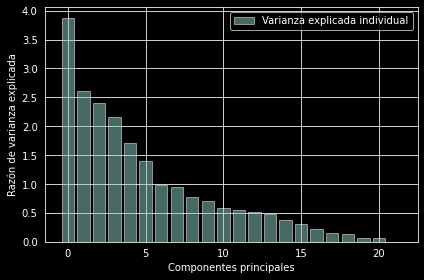

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='Varianza explicada individual')
    plt.ylabel('Razón de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
pca_mod=PCA(n_components=6)
pca_mod.fit_transform(X)

In [ ]:
loadings = pca_mod.components_.T * np.sqrt(pca_mod.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'], index=cols)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
cap-shape,0.013996,0.066407,0.030014,-0.230230,0.130602,-0.099066
cap-surface,0.195187,-0.284806,0.122838,0.062831,-0.399076,-0.326161
cap-color,-0.358842,0.404538,-0.146550,0.125123,-0.375235,-0.298075
bruises,-0.604970,-0.571396,-0.247894,-0.213075,-0.100429,0.054679
odor,0.500102,-0.386996,-0.153483,0.068558,0.342601,0.206969
gill-attachment,0.117715,0.144866,-0.361017,-0.772621,-0.368409,0.231103
gill-spacing,0.095936,0.471956,-0.644272,0.217173,0.301290,0.172987
gill-size,0.741492,-0.227497,0.021193,-0.089656,-0.163936,-0.323572
gill-color,-0.729040,-0.177708,-0.198303,0.085404,0.190085,0.205449
stalk-shape,0.427993,-0.300640,-0.199185,-0.412575,0.542333,-0.013661


In [ ]:
covariance_mod=pca_mod.get_covariance()
pd.DataFrame(covariance_mod,columns=cols, index=cols)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
cap-shape,0.495402,-0.038563,-0.024962,-0.019554,-0.012409,0.091424,-0.011043,0.019872,-0.035115,0.113868,0.044239,-0.068502,-0.065632,-0.024021,-0.023171,0.000000,0.091940,-0.167908,-0.038779,-0.084176,0.091287,-0.104846
cap-surface,-0.038563,0.738780,0.012378,0.012808,0.017785,-0.031596,-0.278740,0.302510,-0.203155,-0.053935,-0.145928,0.151578,0.159303,0.097870,0.100937,0.000000,-0.030609,-0.034450,-0.057166,0.222996,0.097995,0.224291
cap-color,-0.024962,0.012378,0.877041,0.025343,-0.403939,0.033025,0.107910,-0.212223,0.109263,-0.405060,0.376985,-0.107195,-0.051129,-0.000695,0.001716,0.000000,0.037398,-0.009752,0.138720,-0.323940,-0.185869,0.162372
bruises,-0.019554,0.012808,0.025343,1.123452,-0.082724,0.109525,-0.198897,-0.279282,0.496338,-0.016972,0.217872,0.469214,0.469465,0.074712,0.084376,0.000000,0.108996,0.047439,0.626622,-0.255251,0.156201,-0.158225
odor,-0.012409,0.017785,-0.403939,-0.082724,0.916871,-0.052762,0.085306,0.307312,-0.158920,0.427034,-0.296008,0.120127,0.068449,0.220786,0.215423,0.000000,-0.058462,0.102355,-0.239596,0.470599,-0.041969,-0.079979
gill-attachment,0.091424,-0.031596,0.033025,0.109525,-0.052762,1.183018,0.068255,0.092771,-0.111461,0.171496,0.120834,-0.090152,-0.108461,0.101372,0.100650,0.000000,0.739452,0.056691,-0.120938,-0.014708,0.140009,-0.021134
gill-spacing,-0.011043,-0.278740,0.107910,-0.198897,0.085306,0.068255,1.090415,-0.128986,0.055033,0.072162,0.308317,-0.229155,-0.225916,0.263107,0.253726,0.000000,0.063993,0.185879,-0.200448,0.011901,-0.508981,-0.060258
gill-size,0.019872,0.302510,-0.212223,-0.279282,0.307312,0.092771,-0.128986,1.060370,-0.525942,0.302104,-0.305877,-0.003944,-0.022448,0.248223,0.245179,0.000000,0.088716,-0.105544,-0.476731,0.535196,0.066798,0.178466
gill-color,-0.035115,-0.203155,0.109263,0.496338,-0.158920,-0.111461,0.055033,-0.525942,1.022211,-0.153491,0.303544,0.255205,0.265670,-0.058772,-0.053194,0.000000,-0.107853,0.096782,0.595479,-0.413358,-0.047064,-0.213995
stalk-shape,0.113868,-0.053935,-0.405060,-0.016972,0.427034,0.171496,0.072162,0.302104,-0.153491,1.056470,-0.125863,0.045103,0.003974,0.219015,0.216602,0.000000,0.166454,-0.212907,-0.226906,0.255136,0.121055,-0.290624


In [ ]:
explained_variance_mod=pca_mod.explained_variance_
explained_variance_mod

array([3.87410924, 2.60339434, 2.40073834, 2.16674719, 1.70303181,
       1.39495572])

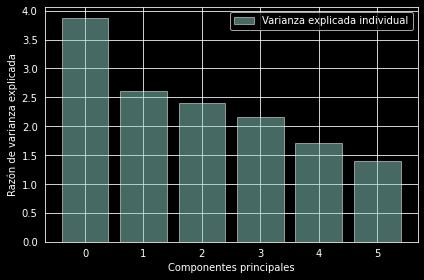

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(6), explained_variance_mod, alpha=0.5, align='center',
             label='Varianza explicada individual')
    plt.ylabel('Razón de varianza explicada')
    plt.xlabel('Componentes principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
loading_matrix[abs(loading_matrix['PC1'])>.50]

,PC1,PC2,PC3,PC4,PC5,PC6
bruises,-0.604970,-0.571396,-0.247894,-0.213075,-0.100429,0.054679
odor,0.500102,-0.386996,-0.153483,0.068558,0.342601,0.206969
gill-size,0.741492,-0.227497,0.021193,-0.089656,-0.163936,-0.323572
gill-color,-0.729040,-0.177708,-0.198303,0.085404,0.190085,0.205449
ring-type,-0.820685,-0.374927,-0.028748,0.014849,-0.020083,0.034292
spore-print-color,0.774672,-0.347268,-0.097512,0.245636,-0.147595,0.180188


In [ ]:
features = ["bruises", "odor", "gill-size", "gill-color","ring-type","spore-print-color"]

fig = px.scatter_matrix(
    df_copy,
    dimensions=features,
    color="class",
     color_discrete_map={"poisonous":'#722672','edible':'#24ED16'}
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
df_rel=df_copy[["ID_Class","class","bruises", "odor", "gill-size", "gill-color","ring-type","spore-print-color"]]
fig = px.parallel_categories(df_rel, color="ID_Class", title="Mushroom Types", 
                             color_continuous_scale=['#722672','#FF6B0F','#24ED16'])
fig.show()